<h1 align ='center'> Performance metric of Linear Regression </h1>

### <font color='red'>Performance Metrics </font>

1. Mean Squared Error __MSE__
2. Mean Absolute Error __MAE__
3. Root Mean Squared Error __RMSE__
3. __R2_score__
4. __Adjusted r2_score__


### Import libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.shape

(200, 2)

C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa', ylabel='package'>

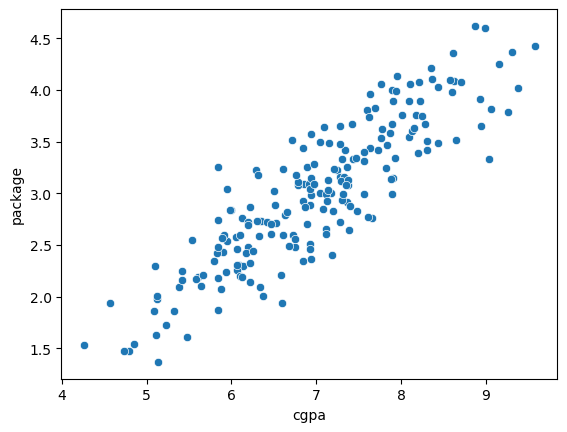

In [5]:
sns.scatterplot(df['cgpa'],df['package'])

#### Independant and dependant variable

In [6]:
X = df.iloc[:,0:1]
y = df.iloc[:,1]
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


#### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=2)


### Model Training

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

#### Visulaization of linear regression

C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


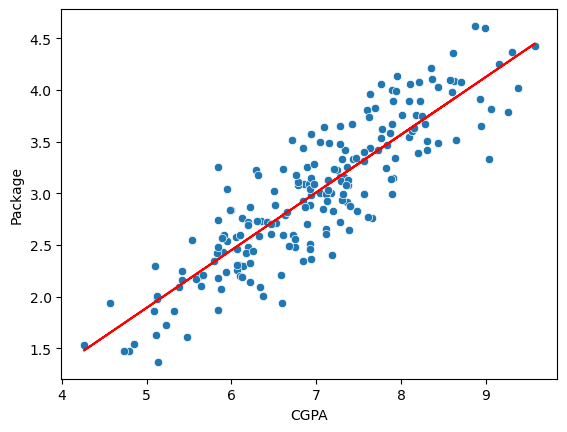

In [12]:
sns.scatterplot(df['cgpa'],df['package'])
plt.plot(X_train, lr.predict(X_train),color= 'red')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

#### Performance Metrics

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
y_pred = lr.predict(X_test)

In [15]:
print("Mean Absolute Error = ", mean_absolute_error(y_test,y_pred))
print('Mean Squared Error = ', mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score = ', r2_score(y_test,y_pred))

Mean Absolute Error =  0.2884710931878175
Mean Squared Error =  0.12129235313495527
Root Mean Squared Error =  0.34827051717731616
R2_score =  0.780730147510384


### Adjusted r2_score

In [16]:
r2 = r2_score(y_test,y_pred)

In [17]:
X_train.shape

(160, 1)

In [18]:
def Adjusted_r2(y_test,y_pred):
    r2 = r2_score(y_test,y_pred)
    n = X_test.shape[0]
    p =X_test.shape[1]
    
    # Adjusted r2
    
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1)) 
    
    return adjusted_r2
    

In [19]:
Adjusted_r2(y_test,y_pred)

0.7749598882343415

In [20]:
new_df = df.copy()

In [21]:
new_df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [22]:
new_df['Random_data1']=np.random.random(200)
new_df['Random_data2']=np.random.random(200)

In [23]:
new_df.head()

,cgpa,package,Random_data1,Random_data2
0,6.89,3.26,0.989002,0.814349
1,5.12,1.98,0.123320,0.111354
2,7.82,3.25,0.925709,0.486166
3,7.42,3.67,0.471367,0.415443
4,6.94,3.57,0.979754,0.779275


C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Random_data1', ylabel='package'>

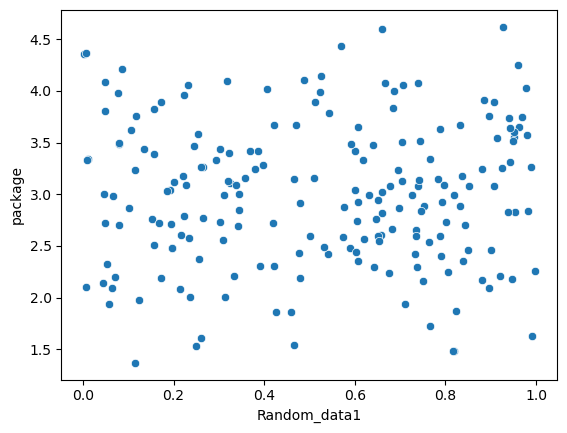

In [25]:
sns.scatterplot(new_df['Random_data1'],new_df['package'])

C:\Users\Amruta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Random_data1', ylabel='package'>

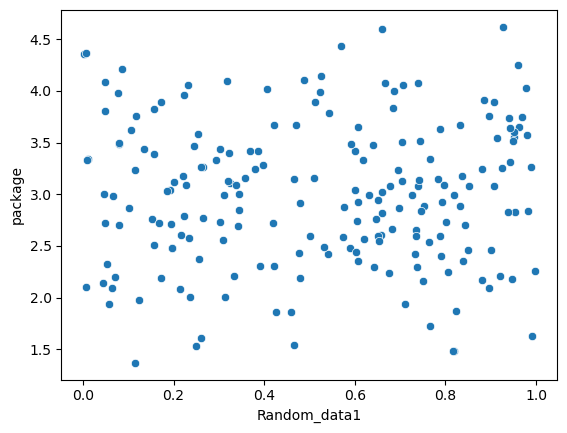

In [26]:
sns.scatterplot(new_df['Random_data1'],new_df['package'])

In [31]:
X=new_df.drop(columns='package')
y = new_df['package']


In [32]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=2)


In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
r2_score(y_test,y_pred)

0.7771088066291096

In [37]:
Adjusted_r2(y_test,y_pred)

0.7585345405148688